### Weighted Degree (Node Strength)
For weighted networks, the node degree is defined as:

$$
s_i = \sum_{j \in N(i)} w_{ij}
$$

where:

- \( sᵢ \) is the strength (weighted degree) of node \( i \)
- \( N(i) \) is the set of neighbors of node \( i \)
- \( wᵢⱼ \) is the weight of the edge between nodes \( i \) and \( j \)

### Weighted Clustering Coefficient

I used the formula proposed by Barrat et al. (2004), which says, For weighted networks, the Clustering Coefficient of a node i is:

$$
C_i^w = \frac{1}{s_i(k_i-1)} \sum_{j,h} \frac{w_{ij} + w_{ih}}{2} a_{ij} a_{ih} a_{jh}
$$

where:
- \( Cᵢʷ\) is the weighted clustering coefficient of node i 
- \( sᵢ \) is the strength (weighted degree) of node i 
- \( kᵢ \) is the degree of node i 
- \( wᵢⱼ \) is the weight of the edge between nodes i and j
- \( aᵢⱼ \) is 1 if nodes i and j are connected, 0 otherwise

**NOTE: In question 5 i have visulaized all the three graphs that i used in Q1,Q2,Q3 from the Assignment 1 with 3 different layout of each. Also i have saved two files of each layout png and pdf, pdf file is high definition file in which we can zoom in and see the nodes, edges and weights clearly. I have attached the cystoscope session file also in the submission.**

In [1]:
import csv
from collections import defaultdict
import matplotlib.pyplot as plt

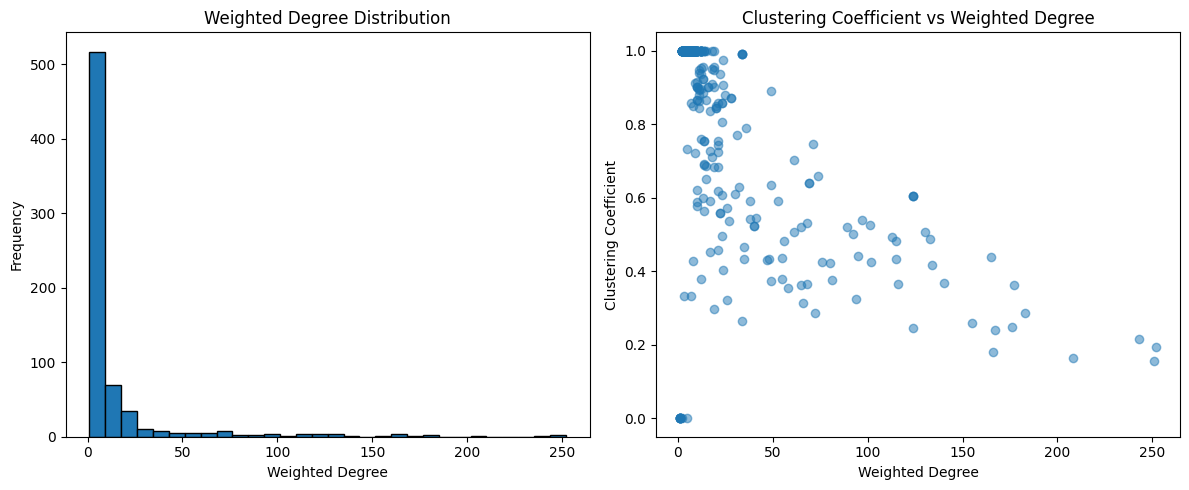


Network Statistics:
Number of nodes: 694
Average weighted degree: 15.32
Average clustering coefficient: 0.90


In [2]:
class WeightedNetwork:
    def __init__(self):
        self.graph = defaultdict(dict)
        self.nodes = set()

    def edge(self, source, target, weight):
        self.graph[source][target] = weight
        self.graph[target][source] = weight
        self.nodes.add(source)
        self.nodes.add(target)

    def weightedDeg(self, node):
        return sum(self.graph[node].values())

    def clusCoeff(self, node):
        neighbors = list(self.graph[node].keys())
        k_i = len(neighbors)

        if k_i < 2:
            return 0.0

        s_i = self.weightedDeg(node)

        total = 0
        for j in range(k_i):
            for h in range(j + 1, k_i):
                neighbor1 = neighbors[j]
                neighbor2 = neighbors[h]
                if neighbor2 in self.graph[neighbor1]:
                    w_ij = self.graph[node][neighbor1]
                    w_ih = self.graph[node][neighbor2]
                    total += (w_ij + w_ih) / 2

        normWght = s_i * (k_i - 1)
        if normWght == 0:
            return 0.0

        return (2 *total)/normWght

    def network(self):
        degrees = {}
        clustering_coeffs = {}

        for node in self.nodes:
            degrees[node] = self.weightedDeg(node)
            clustering_coeffs[node] = self.clusCoeff(node)

        return degrees, clustering_coeffs

    def plot(self, degrees, clustering_coeffs):
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        degree_values = list(degrees.values())
        plt.hist(degree_values, bins=30, edgecolor='black')
        plt.xlabel('Weighted Degree')
        plt.ylabel('Frequency')
        plt.title('Weighted Degree Distribution')

        plt.subplot(1, 2, 2)
        plt.scatter(list(degrees.values()), list(
            clustering_coeffs.values()), alpha=0.5)
        plt.xlabel('Weighted Degree')
        plt.ylabel('Clustering Coefficient')
        plt.title('Clustering Coefficient vs Weighted Degree')
        plt.savefig('network.png')
        plt.tight_layout()
        plt.show()


def load(filename):
    network = WeightedNetwork()
    with open(filename, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            source = row['Source']
            target = row['Target']
            weight = float(row['Weight'])
            network.edge(source, target, weight)

    return network


network = load('data.csv')
degrees, cc = network.network()
network.plot(degrees, cc)

print("\nNetwork Statistics:")
print(f"Number of nodes: {len(network.nodes)}")
print(f"Average weighted degree: {sum(degrees.values()) / len(degrees):.2f}")
print(f"Average clustering coefficient: {sum(cc.values()) / len(cc):.2f}")